# Data Analysis with Pandas - Cycle Share Data
## Matthew Santorsola
## 13 Jul 21

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# https://stackoverflow.com/questions/55010807/pandas-errors-parsererror-expected-after
df = pd.read_csv('trip.csv', sep=',', header=0, engine='python', quotechar='"',  error_bad_lines=False)

#"trip_id","starttime","stoptime","bikeid","tripduration","from_station_name","to_station_name","from_station_id","to_station_id","usertype","gender","birthyear" '/t'

/Users/santo/codefellows/401/labs/data-analysis/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 50794: ',' expected after '"'


In [49]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [53]:
df1 = df.copy()

In [54]:
df1.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

In [62]:
# What is the average trip duration for a borrowed bicycle?
df1.tripduration.mean().round(1)

1178.3

In [78]:
from datetime import datetime, date

df1['starttime'] = pd.to_datetime(df1.starttime)
df1['stoptime'] = pd.to_datetime(df1.stoptime)


In [71]:
df1.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [82]:
# https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
year = df1.starttime.dt.year
avg_age = year - df1.birthyear

In [88]:
# What’s the most common age of a bicycle-sharer?
avg_age.mean().round(1)

35.3

In [110]:
# Given all the weather data here, find the average precipitation per month, and the median precipitation

#wx = pd.read_csv('weather.csv', sep=',', header=0, engine='python', quotechar='"',  error_bad_lines=False)
wx = pd.read_csv('weather.csv')


In [90]:
wx.shape

(689, 21)

In [91]:
wx.head(5)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [92]:
wx.dtypes

Date                           object
Max_Temperature_F               int64
Mean_Temperature_F            float64
Min_TemperatureF                int64
Max_Dew_Point_F                 int64
MeanDew_Point_F                 int64
Min_Dewpoint_F                  int64
Max_Humidity                    int64
Mean_Humidity                   int64
Min_Humidity                    int64
Max_Sea_Level_Pressure_In     float64
Mean_Sea_Level_Pressure_In    float64
Min_Sea_Level_Pressure_In     float64
Max_Visibility_Miles            int64
Mean_Visibility_Miles           int64
Min_Visibility_Miles            int64
Max_Wind_Speed_MPH              int64
Mean_Wind_Speed_MPH             int64
Max_Gust_Speed_MPH             object
Precipitation_In              float64
Events                         object
dtype: object

In [96]:
wx1 = wx.copy()

In [97]:
wx1['Date'] = pd.to_datetime(wx1.Date)

In [98]:
wx1.dtypes

Date                          datetime64[ns]
Max_Temperature_F                      int64
Mean_Temperature_F                   float64
Min_TemperatureF                       int64
Max_Dew_Point_F                        int64
MeanDew_Point_F                        int64
Min_Dewpoint_F                         int64
Max_Humidity                           int64
Mean_Humidity                          int64
Min_Humidity                           int64
Max_Sea_Level_Pressure_In            float64
Mean_Sea_Level_Pressure_In           float64
Min_Sea_Level_Pressure_In            float64
Max_Visibility_Miles                   int64
Mean_Visibility_Miles                  int64
Min_Visibility_Miles                   int64
Max_Wind_Speed_MPH                     int64
Mean_Wind_Speed_MPH                    int64
Max_Gust_Speed_MPH                    object
Precipitation_In                     float64
Events                                object
dtype: object

In [101]:
wx1['Month'] = wx1.Date.dt.month

In [174]:
# Given all the weather data here, find the average precipitation per month, and the median precipitation.

wx1.pivot_table(index='Month', values='Precipitation_In', aggfunc='sum').round(3).sort_values('Precipitation_In',ascending=False)[:12]

,Precipitation_In
Month,
12,14.65
11,11.27
3,9.73
2,9.60
10,9.45
1,8.90
4,3.08
6,1.83
9,1.23


In [176]:
# Average precipitation in
wx1.pivot_table(index='Month', values='Precipitation_In', aggfunc='mean').round(3).sort_values('Precipitation_In',ascending=False)[:12]

,Precipitation_In
Month,
12,0.236
10,0.189
11,0.188
2,0.168
3,0.157
1,0.144
4,0.051
9,0.041
6,0.031


In [177]:
# Median precipitation in
wx1.pivot_table(index='Month', values='Precipitation_In', aggfunc='median').round(3).sort_values('Precipitation_In',ascending=False)[:12]

,Precipitation_In
Month,
12,0.100
2,0.040
10,0.040
11,0.035
3,0.025
1,0.020
4,0.000
5,0.000
6,0.000


In [113]:
#wx = pd.read_csv('weather.csv', sep=',', header=0, engine='python', quotechar='"',  error_bad_lines=False)
st = pd.read_csv('station.csv')

In [119]:
st1 = st.copy()

In [121]:
st1.current_dockcount.describe()

count    58.000000
mean     16.517241
std       5.117021
min       0.000000
25%      16.000000
50%      18.000000
75%      18.000000
max      26.000000
Name: current_dockcount, dtype: float64

In [124]:
df1.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                       object
tripduration                float64
from_station_name            object
to_station_name              object
from_station_id              object
to_station_id                object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [126]:
df1['trip_month'] = df1.starttime.dt.month
df1['trip_year'] = df1.starttime.dt.year

In [141]:
st1['bike_delta'] = st1.current_dockcount - st1.install_dockcount

In [180]:
delta = st1[st1['bike_delta'] != 0][['modification_date','bike_delta']].sort_values('modification_date')

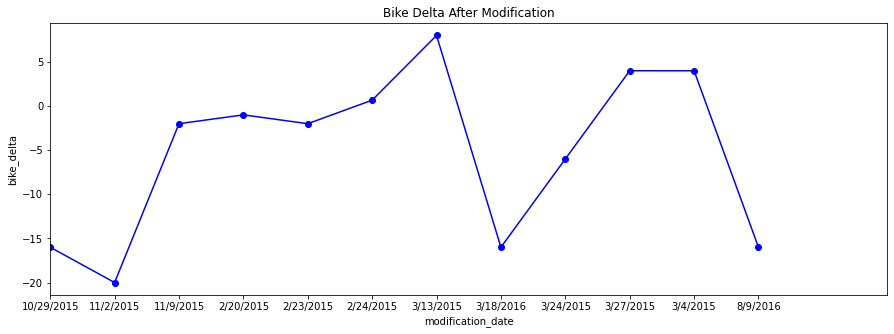

In [171]:
plt.figure(figsize=[15,5])
plt.plot(st1.groupby('modification_date').mean()['bike_delta'],'-ob')
plt.xlabel('modification_date')
plt.ylabel('bike_delta')
plt.title('Changes in the number of bikes after modification')
plt.xlim([0,13])
plt.show()

In [183]:
delta.mean()

/var/folders/dt/32g382hd2790vpfhx9phrz4r0000gn/T/ipykernel_72710/3309618624.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  delta.mean()


bike_delta   -3.263158
dtype: float64